In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('Main Dataset/Skewed dataset/Customer_Shopping_Details.xlsx')
df.head()

,Unnamed: 0,Customer_ID,Total_Returns,Total_Orders,Total_Amount,Refund_Amount,Difference_in_days,Rating,Retained_Amount,Retained_Orders,Credit_Score
0,0,9236000,3,8,2914,1113,5,3.366667,1801,5,491.734222
1,1,9236001,1,6,2012,289,1,4.500000,1723,5,590.648878
2,2,9236002,1,2,569,274,1,4.000000,295,1,469.631910
3,3,9236003,3,7,1713,910,2,3.600000,803,4,427.460634
4,4,9236004,3,4,1342,993,5,3.000000,349,1,371.931432


In [3]:
df = df.drop(['Unnamed: 0'], axis =1)
df.head()

,Customer_ID,Total_Returns,Total_Orders,Total_Amount,Refund_Amount,Difference_in_days,Rating,Retained_Amount,Retained_Orders,Credit_Score
0,9236000,3,8,2914,1113,5,3.366667,1801,5,491.734222
1,9236001,1,6,2012,289,1,4.500000,1723,5,590.648878
2,9236002,1,2,569,274,1,4.000000,295,1,469.631910
3,9236003,3,7,1713,910,2,3.600000,803,4,427.460634
4,9236004,3,4,1342,993,5,3.000000,349,1,371.931432


In [4]:
dataset = df.values
X = dataset[:,1:9]
Y = dataset[:,9]
X,Y

(array([[3.00000000e+00, 8.00000000e+00, 2.91400000e+03, ...,
         3.36666667e+00, 1.80100000e+03, 5.00000000e+00],
        [1.00000000e+00, 6.00000000e+00, 2.01200000e+03, ...,
         4.50000000e+00, 1.72300000e+03, 5.00000000e+00],
        [1.00000000e+00, 2.00000000e+00, 5.69000000e+02, ...,
         4.00000000e+00, 2.95000000e+02, 1.00000000e+00],
        ...,
        [1.00000000e+00, 2.00000000e+00, 6.71000000e+02, ...,
         2.30000000e+00, 3.52000000e+02, 1.00000000e+00],
        [2.00000000e+00, 4.00000000e+00, 1.94300000e+03, ...,
         2.90000000e+00, 6.09000000e+02, 2.00000000e+00],
        [1.00000000e+00, 3.00000000e+00, 8.79000000e+02, ...,
         2.50000000e+00, 6.63000000e+02, 2.00000000e+00]]),
 array([491.73422184, 590.64887755, 469.63190957, ..., 475.45061955,
        427.97607682, 505.35976547]))

In [5]:
X = dataset[:,1:9]
Y = dataset[:,9]
X,Y

(array([[3.00000000e+00, 8.00000000e+00, 2.91400000e+03, ...,
         3.36666667e+00, 1.80100000e+03, 5.00000000e+00],
        [1.00000000e+00, 6.00000000e+00, 2.01200000e+03, ...,
         4.50000000e+00, 1.72300000e+03, 5.00000000e+00],
        [1.00000000e+00, 2.00000000e+00, 5.69000000e+02, ...,
         4.00000000e+00, 2.95000000e+02, 1.00000000e+00],
        ...,
        [1.00000000e+00, 2.00000000e+00, 6.71000000e+02, ...,
         2.30000000e+00, 3.52000000e+02, 1.00000000e+00],
        [2.00000000e+00, 4.00000000e+00, 1.94300000e+03, ...,
         2.90000000e+00, 6.09000000e+02, 2.00000000e+00],
        [1.00000000e+00, 3.00000000e+00, 8.79000000e+02, ...,
         2.50000000e+00, 6.63000000e+02, 2.00000000e+00]]),
 array([491.73422184, 590.64887755, 469.63190957, ..., 475.45061955,
        427.97607682, 505.35976547]))

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3175, 8) (794, 8) (3175,) (794,)


In [12]:
#GradientBoostingRegressor

scaler = StandardScaler().fit(X_train)
# rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(X_train, Y_train)
# hist = model.fit(X_train, Y_train,
#                  batch_size=32, epochs=100,
#                  validation_data=(X_test, Y_test))

# transform the validation dataset
# rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)

#creating pickle file
# pickle.dump(model, open('final_prediction.pickle', 'wb'))

#working directory
# joblib_file = "best_model.pkl"   
# joblib.dump(model, joblib_file)

print (mean_squared_error(Y_test, predictions))

10.501864352473028


In [13]:
#Comparing Test data with Actual Dataset

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
0,485.827793,482.425851
1,637.578657,634.597576
2,446.767023,447.235921
3,587.332253,583.856336
4,568.864081,565.318306
5,495.709555,493.333753
6,443.807910,443.281558
7,430.885745,430.430220
8,459.787444,459.093398
9,403.042598,401.133383


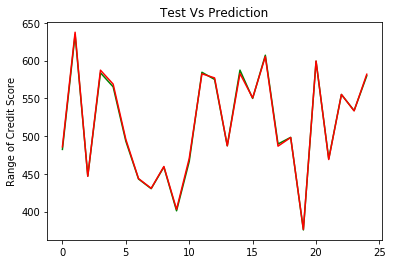

In [11]:
# plotting graph for GradientBoostingRegressor.
plt.style.use('seaborn-colorblind')
plt.plot(compare['Test Data'].head(25), color = "green")
plt.plot(compare['Prediction'].head(25), color = "red")
plt.title("Test Vs Prediction")
# plt.xlabel("")
plt.ylabel("Range of Credit Score")
plt.show()

In [29]:
# Parameters = df.columns

Index(['Customer_ID', 'Total_Returns', 'Total_Orders', 'Total_Amount',
       'Refund_Amount', 'Difference_in_days', 'Rating', 'Retained_Amount',
       'Retained_Orders', 'Credit_Score'],
      dtype='object')

In [31]:
#Tests

#Test1
values = [[1,12, 8050, 250, 2, 2.33, 7050, 11 ]]
pr = model.predict(values)
print('Credit Score',*pr)
print('So it was a good customer...\n')

#Test2
values = [[3,12, 8050, 2000, 5, 4.33, 6050, 9 ]]
pr = model.predict(values)
print('Credit Score',*pr)
print('So it was a average customer...\n')

#Test3
values = [[6,12, 8050, 4000, 8, 2.33, 4050, 6 ]]
pr = model.predict(values)
print('Credit Score',*pr)
print('So it was a bad customer...')

Credit Score 875.1207875281443
So it was a good customer...

Credit Score 611.2187156934469
So it was a average customer...

Credit Score 349.87762471742764
So it was a bad customer...


In [13]:
# Neural Network Regressor
# define base model

# def baseline_model():
#     model = Sequential()
#     model.add(Dense(8, input_dim=8, activation='relu'))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model


# estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=0.2)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# estimator.fit(X_train, Y_train)
# prediction = estimator.predict(X_test)
# print(prediction)


Results: -258955.89 (3992.49) MSE


In [14]:
#Comparing Test data with Actual Dataset

# compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
# compare.head(10)

,Prediction,Test Data
0,485.827793,482.425851
1,637.578657,634.597576
2,446.767023,447.235921
3,587.332253,583.856336
4,568.864081,565.318306
5,495.709555,493.333753
6,443.807910,443.281558
7,430.885745,430.430220
8,459.787444,459.093398
9,403.042598,401.133383


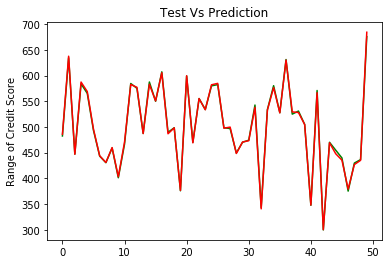

In [15]:
# plotting graph for Neural Network regressor.
# plt.style.use('seaborn-colorblind')
# plt.plot(compare['Test Data'].head(50), color = "green")
# plt.plot(compare['Prediction'].head(50), color = "red")
# plt.title("Test Vs Prediction")
# # plt.xlabel("")
# plt.ylabel("Range of Credit Score")
# plt.show()

In [ ]:
# plt.bar(compare['Test Data'].head(50))